# Data Analysis with Python - Módulo 4

Elmer Payro - A01014943

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Simple Linear Regression vs Multiple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

X = df[['highway-mpg']]
Y = df['price']

lm = LinearRegression()
lm.fit(X,Y)

y_hat = lm.predict(X)
y_hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
print('Slope | ',lm.coef_)
print('Intercept | ',lm.intercept_)
print('R2 | ',lm.score(X,Y))

38423.3058581574
[-821.73337832]
R2 |  0.4965911884339176


In [11]:
X = df[['engine-size']]
Y = df['price']

lm1 = LinearRegression()
lm1.fit(X,Y)

y_hat = lm1.predict(X)
print('Slope | ',lm1.coef_)
print('Intercept | ',lm1.intercept_)
print('R2 | ',lm1.score(X,Y))
#Price=-7963.34 + 166.86*df['engine-size']

Slope |  [166.86001569]
Intercept |  -7963.338906281024
R2 |  0.7609686443622008


# Multiple Linear Regression

In [13]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])

print('Slope | ',lm.coef_)
print('Intercept | ',lm.intercept_)
print('R2 | ',lm.score(Z,Y))

Slope |  [53.49574423  4.70770099 81.53026382 36.05748882]
Intercept |  -15806.62462632923
R2 |  0.8093562806577457


# Model Evaluation Using Visualization

## Regression Plot

(0.0, 48175.59017184813)

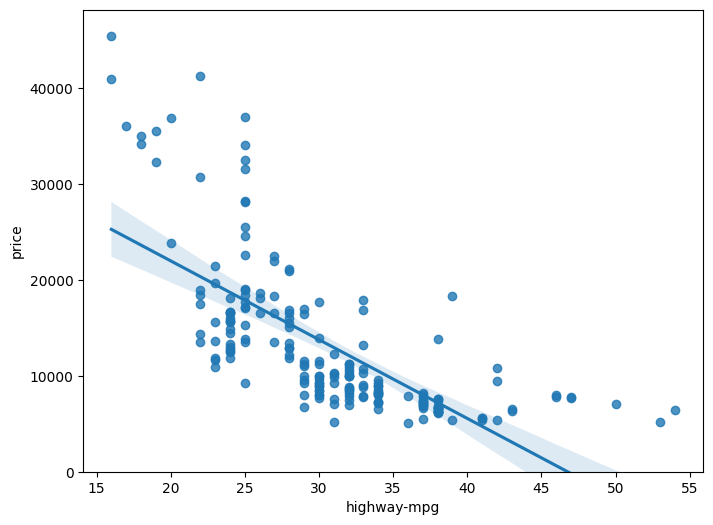

In [18]:
import seaborn as sns
# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

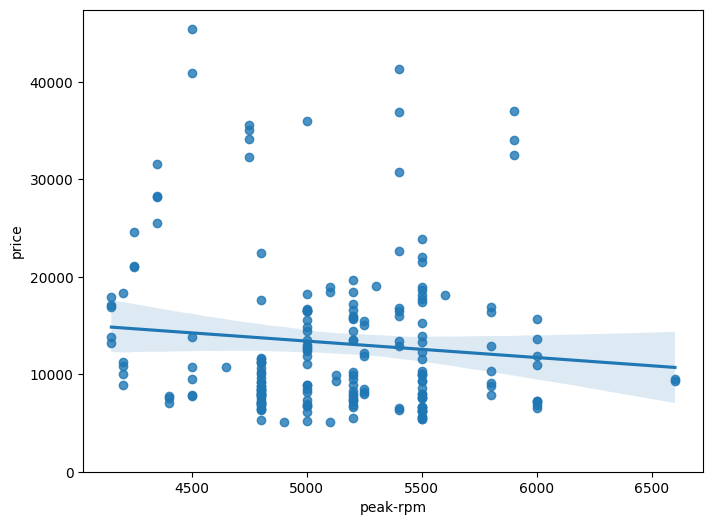

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


## Residual Plot
We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

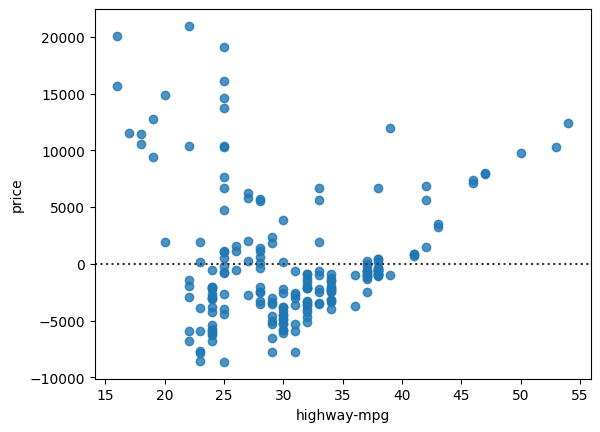

In [21]:
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


## Distribution Plot

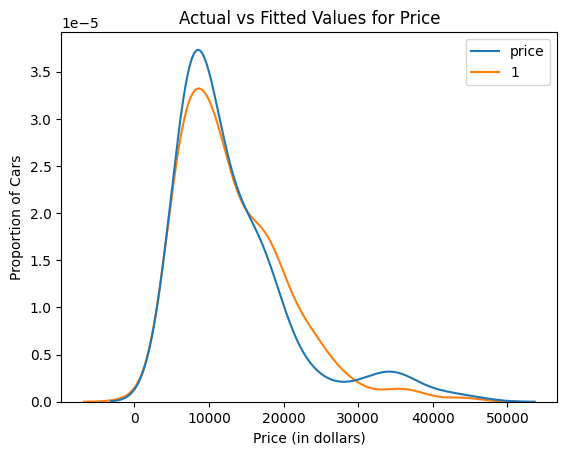

In [32]:
Y_hat = lm.predict(Z)

#ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
#sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
# New version
sns.kdeplot([df['price'],Y_hat])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression and Pipelines

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


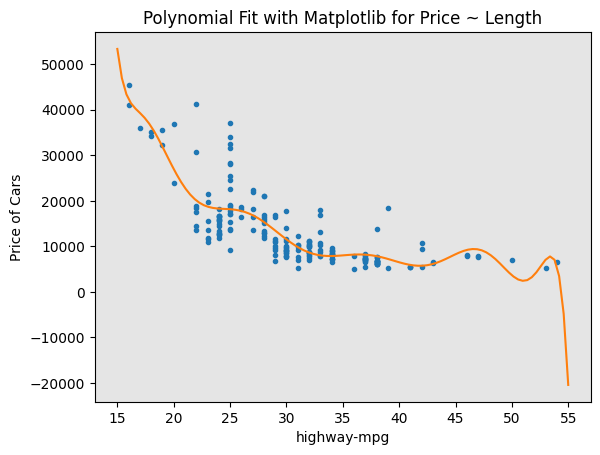

In [43]:
PlotPolly(p, x, y, 'highway-mpg')

In [40]:
np.polyfit(x, y, 11)

array([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640305e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845741e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## Measures for In-Sample Evaluation

### Simple Linear Regression

In [55]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [57]:
from sklearn.metrics import mean_squared_error

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
mse = mean_squared_error(df['price'], Yhat)
print(f'The mean square error of price and predicted value is: {mse:,.2f}')

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]
The mean square error of price and predicted value is: 15,021,126.03


### Multiple Linear Regression

In [60]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [61]:
Y_predict_multifit = lm.predict(Z)
mse = mean_squared_error(df['price'], Y_predict_multifit)
print(f'The mean square error of price and predicted value using multifit is: {mse:,.2f}')

The mean square error of price and predicted value using multifit is: 11,980,366.87


### Polynomial Fit

c:\Users\elmer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


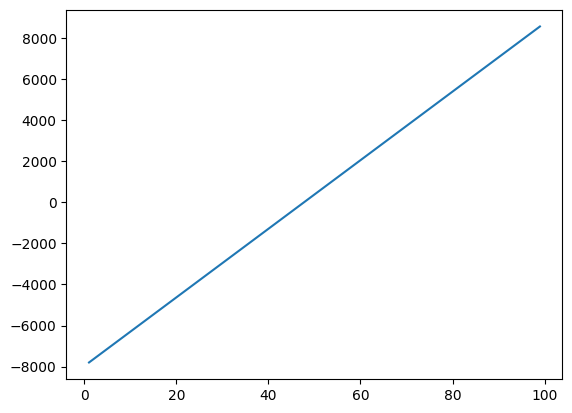

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)

plt.plot(new_input, yhat)
plt.show()